In [1]:
# importing prerequisite libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf 


this dataset can be found in kaggle/datasets.com

In [2]:
# uploading our dataset from a local directory
df = pd.read_csv(r'../tochora/baba/spotify/reviews.csv')
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [3]:
#shape of our dataset
df.shape

(61594, 5)

our dataset has 61594 rows and 5 columns.its a quite big dataset!

The reply is quite imbued by Nan values, first we have to look at a plot of ratings of reviews in reply column before we discard it.

c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of reviews of')

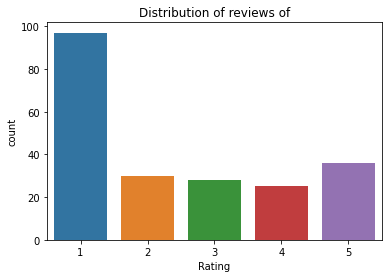

In [4]:
# a count plot of distributions of ratings from reply column
reply = df[~df['Reply'].isna()]
ax = sns.countplot(reply['Rating'])
ax.set_title("Distribution of reviews in reply column")



reviews rated 1 had the highest bar, followed by those rated 5.the rest had almost bars of the same size.Conclusion:Most of the replies were from customers who were very dissatisfied by the app performance , followed by those who were fully satisfied by it.

Wordcloud is a garphical representation of words that are frequent and most relevant in the text.below is a wordcloud of frequent words in the reply column.

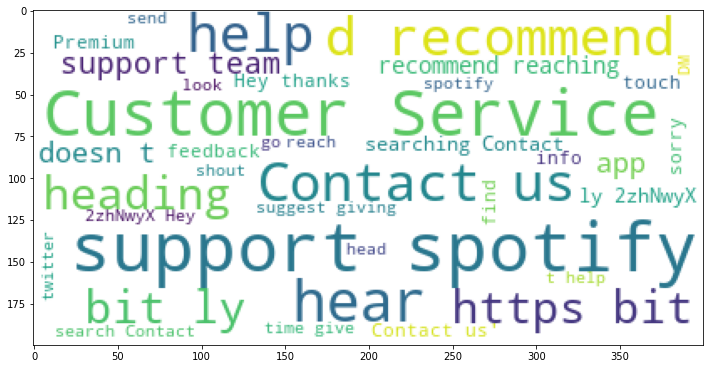

In [5]:
from wordcloud import WordCloud
plt.figure(figsize=(12, 12))
wc = WordCloud(max_words=2000, min_font_size=10, background_color='white').generate(" ".join(reply['Reply']))
plt.imshow(wc)


In [6]:
# a function to depict frequent words 
def top_words(text):
    word = pd.DataFrame(wc.process_text(" ".join(text)).items()).sort_values(1, ascending=False)
    print("top 5 words")
    for i in range(5):
        item = word.iloc[i]
        print(item[0] + "====>  " + str(item[1]))

In [7]:
#frequent words in reply column
top_words(reply['Reply'])

top 6 words
support spotify====>  120
Customer Service====>  104
hear====>  84
help====>  73
Contact us====>  71
d recommend====>  70


frequent words in the reply column: support spotify with 120 entries, followed by customer service with 104 entries while the least wasContact us with 71 entries.


In [8]:
df.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

Time-submitted column is made up of dates but in object datatype form.First we will convert it into datetime and see the relationship between dates and distribution of reviews throught the period that was covered.

In [9]:
# converting Time submitted column from being an object into datetime
df['Time_submitted'] = pd.to_datetime(df['Time_submitted'])
# creating a date column
df['Date'] = df['Time_submitted'].apply(lambda x : x.date())
# combining dates with frequeny of reviews in that particular date
reviews_per_day = df.groupby(df['Date']).count()['Review']
reviews_per_day = reviews_per_day.reset_index()
#creating a month column
reviews_per_day['Month'] = reviews_per_day['Date'].apply(lambda x : x.month)
# renaming review column into Total review
reviews_per_day.rename(columns= {"Review": "Total_Review"}, inplace=True)
reviews_per_day.head()

,Date,Total_Review,Month
0,2022-01-01,46,1
1,2022-01-02,43,1
2,2022-01-03,66,1
3,2022-01-04,56,1
4,2022-01-05,64,1


In [10]:
# checking variou datatypes of our columns
reviews_per_day.dtypes

Date            object
Total_Review     int64
Month            int64
dtype: object

Below is visualisation of reviews using a lineplot

Text(0.5, 1.0, 'Distribution of reviews')

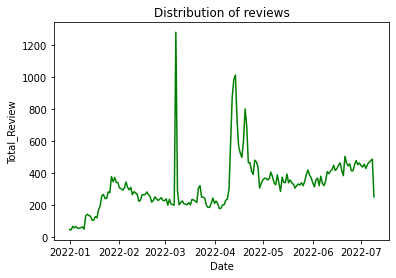

In [11]:
ax = sns.lineplot(x= "Date", y="Total_Review", data=reviews_per_day, color='green')
ax.set_title('Distribution of reviews')

it seems there was a temporary hike in the number of reviews during 2022-03 and also significant  rise in the number of reviews between 2022-04-04 to 2022-05.There was a general rising trend of reviews throughout the period .

Below is a function to convert ratings from interger values into strings for the sake of analysis and prediction in our model.This will help to aggregate various ratings into few manageble classes of ratings.

In [13]:
# afunction to convert ratings from ratings into strings
def rating(score):
    if score > 3:
        return "High"
    elif score == 3:
        return "Normal"
    else:
        return "Low"
#applying this function to rating column
df['ratings'] = df['Rating'].apply(rating)
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Date,ratings
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,2022-07-09,High
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,2022-07-09,High
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,2022-07-09,High
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,2022-07-09,Low
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,2022-07-09,Low


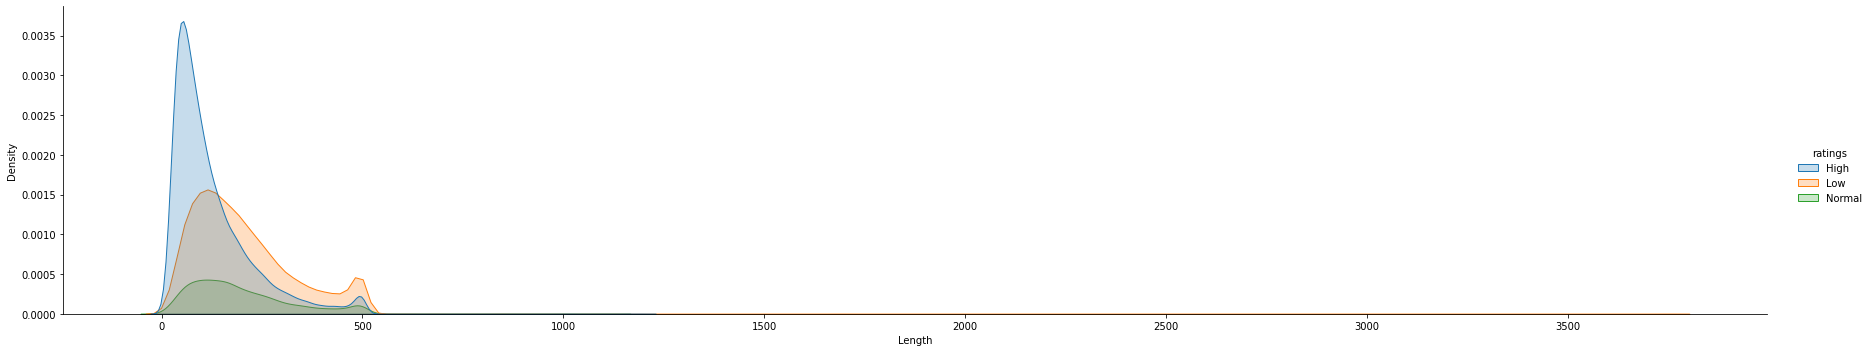

In [14]:
df['Length'] = df['Review'].apply(len)
sns.displot(data=df, x='Length', hue='ratings', kind='kde',aspect=5, fill=True)
plt.title("Distribution of lengths of the reviews")
plt.show()

the above plot shows that reviews of all rating classes had skewed distributiond to the right 

In [16]:
df.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply', 'Date',
       'ratings', 'Length'],
      dtype='object')

Below is the review that gave the largest Tota-thumbsup.

In [17]:
# total-thumpsup that had the biggest value
max_thumb = df['Total_thumbsup'].max()
# the review that gave the biggest total-thumbsup
print(df[df['Total_thumbsup'] == max_thumb].iloc[0]['Review'])


The app is very good. I got to explore many new songs. However, I took out a star because of a few reasons. First:- It sometimes lags and won't show the music dialog box on your screen or in the app and for this I have to restart it. Second:- I cannot delete my history on phone. Third:- I cannot shuffle playlists or Albums. They have to play on the fixed sequence. Fourth:- I cannot see which song is going to play next if it's a radio and Fifth:- Sometimes the song stops and doesn't start radio


Visualizing ratings with various wordclouds

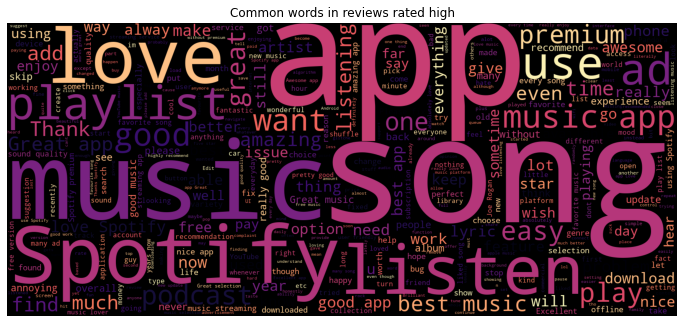

In [18]:
# a wordcloud of reviews rated high
plt.figure(figsize=(12, 12))
wc = WordCloud(max_words=3000, min_font_size=10,height=700, width=1600, background_color='black', colormap='magma').generate(
    " ".join(df[df['ratings']=='High'].Review)
)
plt.axis("off")
plt.title('Common words in reviews rated high')
plt.imshow(wc)


In [19]:
#frequent words of reviews rated high
top_words(df[df['ratings']=='High'].Review)

top 6 words
app====>  7503
song====>  7331
music====>  5974
Spotify====>  5272
love====>  4723
listen====>  3839


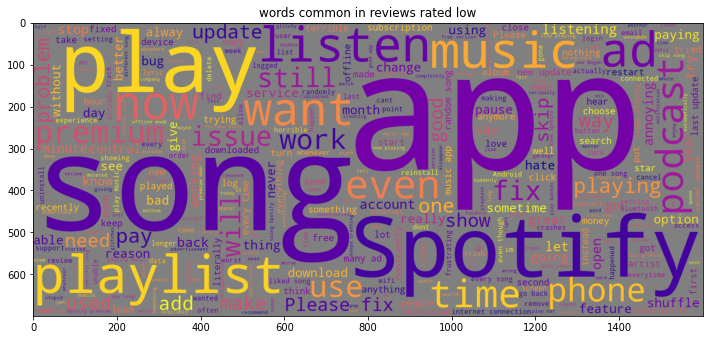

In [20]:
# a wordcloud of reviews rated Low
plt.figure(figsize=(12, 12))
wc = WordCloud(max_words=3000, min_font_size=10, height=700,width=1600, background_color='gray', colormap='plasma').generate(
    " ".join(df[df['ratings']== 'Low'].Review)
)
plt.title("words common in reviews rated low")
plt.imshow(wc)

slicing our datasett into two columns that are relevant to our analysis i.e Review and ratings column

In [21]:
df = df.loc[:, ['Review', 'ratings']]
df.head()

,Review,ratings
0,"Great music service, the audio is high quality...",High
1,Please ignore previous negative rating. This a...,High
2,"This pop-up ""Get the best Spotify experience o...",High
3,Really buggy and terrible to use as of recently,Low
4,Dear Spotify why do I get songs that I didn't ...,Low


Text preprocessing . we are ging to use nltk packages to clean our text so as to remove unnecessary words like stopwords, punctuation marks and converting the text from proper case into lower case.
stopwords are common words like adverbs, prepositions and auxiliary verbs used in a text.
WordNetLemmatizeris used to convert words from various forms into their most basic form example walking => walk, talked => talk etc.



In [22]:
# import prerequisite libraries for data cleaning
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
# a function of cleaning data
def cleaning (text):
    # removing punctuation marks and changing the case of the text into lower case
    clean_text = text.translate(str.maketrans(" ", " ", string.punctuation)).lower()
    # removing stopwords
    clean_text = [w for w in clean_text.split() if w not in set(stopwords.words("english"))]
    #creating an empty list 
    sentence = []
    #applying wordnetlemmatizer to modify words into their basic form
    for w in clean_text:
        lemmatizer = WordNetLemmatizer()
        # adding the cleaned text into an empty list
        sentence.append(lemmatizer.lemmatize(w, 'v'))
        # combining the words that were split into a list
    return " ".join(sentence)


In [23]:
# applying our function to the review column
df['Review'].apply(cleaning)

0        great music service audio high quality app eas...
1        please ignore previous negative rat app super ...
2        popup get best spotify experience android 12 a...
3                       really buggy terrible use recently
4        dear spotify get songs didnt put playlist shuf...
                               ...                        
61589    even though communicate lyric feature availabl...
61590    use sooo good back download free version could...
61591    app would good take device start comp theres s...
61592    app good hard navigate wont let play song clic...
61593    good sometimes doesnt load music play like 8 s...
Name: Review, Length: 61594, dtype: object

In [24]:
# splitting our dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Review'], df['ratings'], test_size=0.20)

LSTM model

This is an advanced type of reinforcement neural network(RNN) that is capable of storing information as it passes various gradient problems that may result information being lost in RNN thus making it possible to classify, process and predict data.

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import  LabelBinarizer
#tokenizer works by splicing paragraphs into small units of 5000 words
tokenizer = Tokenizer(num_words=5000, oov_token= "<OOV>")
# used to update a list of vocaburaly based on texts
tokenizer.fit_on_texts(x_train)
#taking the length of word indices
total_word = len(tokenizer.word_index)
# transforming each text into a sequence of integers
train_seq = tokenizer.texts_to_sequences(x_train)
# 
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_seq)
#converting multiple class labels into binary labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)



In [30]:
import tensorflow as tf
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_word, 8),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(3,activation='softmax')
])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 8)           196328    
                                                                 
 bidirectional_4 (Bidirectio  (None, 32)               3200      
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                        

In [32]:
# compiling and fitting our model
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss= "categorical_crossentropy", metrics=['accuracy'])
model_lstm.fit(train_padded, train_labels, epochs=7, validation_data=(test_padded, test_labels))

Epoch 1/7
1540/1540 [==============================] - 981s 629ms/step - loss: 0.7565 - accuracy: 0.6963 - val_loss: 0.5889 - val_accuracy: 0.7774
Epoch 2/7
1540/1540 [==============================] - 988s 642ms/step - loss: 0.6118 - accuracy: 0.7892 - val_loss: 0.5675 - val_accuracy: 0.7875
Epoch 3/7
1540/1540 [==============================] - 1000s 649ms/step - loss: 0.5837 - accuracy: 0.7965 - val_loss: 0.5753 - val_accuracy: 0.7859
Epoch 4/7
1540/1540 [==============================] - 969s 629ms/step - loss: 0.5659 - accuracy: 0.8036 - val_loss: 0.5651 - val_accuracy: 0.7895
Epoch 5/7
1540/1540 [==============================] - 985s 640ms/step - loss: 0.5517 - accuracy: 0.8055 - val_loss: 0.5641 - val_accuracy: 0.7902
Epoch 6/7
1540/1540 [==============================] - 973s 632ms/step - loss: 0.5402 - accuracy: 0.8093 - val_loss: 0.5855 - val_accuracy: 0.7914
Epoch 7/7
1540/1540 [==============================] - 992s 644ms/step - loss: 0.5307 - accuracy: 0.8120 - val_loss: 

Below is a plot of how our model performed.

<AxesSubplot:>

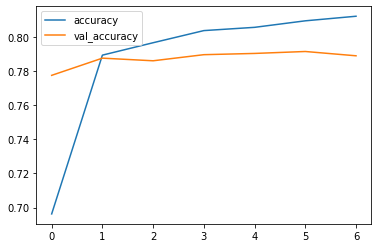

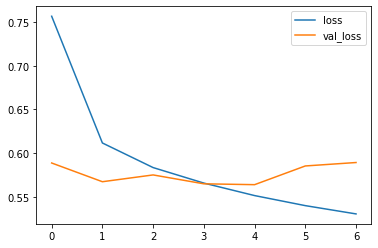

In [34]:
model_history = pd.DataFrame(model_lstm.history.history)
model_history[['accuracy', "val_accuracy"]].plot()
model_history[['loss', 'val_loss']].plot()

The above plots show that our model performed well.

Since our model is good we are going to use it to do predictions.

In [37]:
# a function to be used to predict
def lstm_predictions(text):
    # cleaning our text
    perd = cleaning(text)
    #
    pred_seq = tokenizer.texts_to_sequences([perd])
    pred_paddd = pad_sequences(pred_seq)
    # using our model to carry out predictions
    predict = model_lstm.predict(pred_paddd)
    #
    predictions = lb.inverse_transform(predict)
    return predictions


Using our prediction function to make forecast on what rating a random text is.

In [38]:

text = "this app is amazing.nice features and usability"
lstm_predictions(text)

1/1 [==============================] - 0s 168ms/step


array(['High'], dtype='<U6')

well, it has predicted well.Now lets look how it will respond to a negative text.

In [41]:
text = "i can't delete my search history, song that i want and generally it has a ugly interface"
lstm_predictions(text)

1/1 [==============================] - 0s 178ms/step


array(['Low'], dtype='<U6')